In [84]:
# Library to support working with data
import pandas as pd
import numpy as np

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Performance metrics calculation support library
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error

# Graphing support library
from matplotlib import ticker
import matplotlib.pyplot as plt

In [85]:
!pip install pmdarima

In [86]:
df_BNB = pd.read_csv('BNB-USD.csv')
df_BTC = pd.read_csv('BTC-USD.csv')
df_ETH = pd.read_csv('ETH-USD.csv')


In [87]:
# Convert the 'Date' column to datetime format
df_BNB['Date'] = pd.to_datetime(df_BNB['Date'])
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'])
df_ETH['Date'] = pd.to_datetime(df_ETH['Date'])
# Set the 'Date' column as the index value
df_BNB.set_index('Date', inplace=True)
df_BTC.set_index('Date', inplace=True)
df_ETH.set_index('Date', inplace=True)


In [88]:
# Select the Close column as the dependent variable
df_Close_BNB = df_BNB[['Close']]
df_Close_BNB = df_Close_BNB.reset_index(drop=True)

df_Close_BTC = df_BTC[['Close']]
df_Close_BTC = df_Close_BTC.reset_index(drop=True)

df_Close_ETH = df_ETH[['Close']]
df_Close_ETH = df_Close_ETH.reset_index(drop=True)

In [89]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))

data_scaled_BNB = scaler.fit_transform(np.array(df_Close_BNB))
data_scaled_BTC = scaler.fit_transform(np.array(df_Close_BTC))
data_scaled_ETH = scaler.fit_transform(np.array(df_Close_ETH))

In [90]:
# Split the data into training, validation and test dataset in a ratio of 6:2:2
# DATASET BNB
train_size_BNB = int(0.6 * len(data_scaled_BNB))
val_size_BNB = int(0.2 * len(data_scaled_BNB))
test_size_BNB = len(data_scaled_BNB) - train_size_BNB - val_size_BNB

train_data_BNB = data_scaled_BNB[: train_size_BNB]
val_data_BNB = data_scaled_BNB[train_size_BNB : train_size_BNB + val_size_BNB]
test_data_BNB = data_scaled_BNB[train_size_BNB + val_size_BNB :]
# DATASET BTC
train_size_BTC = int(0.6 * len(data_scaled_BTC))
val_size_BTC = int(0.2 * len(data_scaled_BTC))
test_size_BTC = len(data_scaled_BTC) - train_size_BTC - val_size_BTC

train_data_BTC = data_scaled_BTC[: train_size_BTC]
val_data_BTC = data_scaled_BTC[train_size_BTC : train_size_BTC + val_size_BTC]
test_data_BTC = data_scaled_BTC[train_size_BTC + val_size_BTC :]
# DATASET BNB
train_size_ETH = int(0.6 * len(data_scaled_ETH))
val_size_ETH = int(0.2 * len(data_scaled_ETH))
test_size_ETH = len(data_scaled_ETH) - train_size_ETH - val_size_ETH

train_data_ETH = data_scaled_ETH[: train_size_ETH]
val_data_ETH = data_scaled_ETH[train_size_ETH : train_size_ETH + val_size_ETH]
test_data_ETH = data_scaled_ETH[train_size_ETH + val_size_ETH :]

In [91]:
# Preparing training data

x_train_BNB = np.arange(train_size_BNB).reshape(-1, 1)
y_train_BNB = train_data_BNB.reshape(-1)

x_train_BTC = np.arange(train_size_BTC).reshape(-1, 1)
y_train_BTC = train_data_BTC.reshape(-1)

x_train_ETH = np.arange(train_size_ETH).reshape(-1, 1)
y_train_ETH = train_data_ETH.reshape(-1)
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model_BNB = auto_arima(y_train_BNB, trace=True, error_action='ignore', suppress_warnings=True)
model_BTC = auto_arima(y_train_BTC, trace=True, error_action='ignore', suppress_warnings=True)
model_ETH = auto_arima(y_train_ETH, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5188.710, Time=1.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5159.296, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5177.909, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5174.865, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5160.717, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5184.539, Time=1.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5175.870, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5186.669, Time=2.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-5180.242, Time=3.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5179.086, Time=1.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5180.888, Time=2.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5181.555, Time=0.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-5198.888, Time=6.76 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-5202.942, Time=9.19 sec
 ARIMA(4,1,2)(0,0,0

In [92]:
# Fit the model
model_BNB.fit(y_train_BNB)
model_BTC.fit(y_train_BTC)
model_ETH.fit(y_train_ETH)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [93]:
# Validate process
# Preparing validation data
x_val_BNB = np.array(range(train_size_BNB, train_size_BNB + val_size_BNB)).reshape(-1, 1)
y_val_BNB = np.array(val_data_BNB).reshape(-1)
y_pred_val_BNB = model_BNB.predict(n_periods = len(y_val_BNB))

x_val_BTC = np.array(range(train_size_BTC, train_size_BTC + val_size_BTC)).reshape(-1, 1)
y_val_BTC = np.array(val_data_BTC).reshape(-1)
y_pred_val_BTC = model_BTC.predict(n_periods = len(y_val_BTC))

x_val_ETH = np.array(range(train_size_ETH, train_size_ETH + val_size_ETH)).reshape(-1, 1)
y_val_ETH = np.array(val_data_ETH).reshape(-1)
y_pred_val_ETH = model_ETH.predict(n_periods = len(y_val_ETH))

In [94]:
# Testing process
x_test_BNB = np.array(range(test_size_BNB, train_size_BNB + val_size_BNB + test_size_BNB)).reshape(-1, 1)
y_test_BNB = np.array(test_data_BNB).reshape(-1)
y_pred_BNB = model_BNB.predict(n_periods=len(y_test_BNB))

x_test_BTC = np.array(range(test_size_BTC, train_size_BTC + val_size_BTC + test_size_BTC)).reshape(-1, 1)
y_test_BTC = np.array(test_data_BTC).reshape(-1)
y_pred_BTC = model_BTC.predict(n_periods=len(y_test_BTC))

x_test_ETH = np.array(range(test_size_ETH, train_size_ETH + val_size_ETH + test_size_ETH)).reshape(-1, 1)
y_test_ETH = np.array(test_data_ETH).reshape(-1)
y_pred_ETH = model_ETH.predict(n_periods=len(y_test_ETH))

In [95]:
# Evaluate the accuracy of validation
y_val_BNB = scaler.inverse_transform(np.array([y_val_BNB]).reshape(-1, 1))
y_pred_val_BNB = scaler.inverse_transform(np.array([y_pred_val_BNB]).reshape(-1, 1))

val_mape_BNB = mean_absolute_percentage_error(y_val_BNB, y_pred_val_BNB)
val_mse_BNB = mean_squared_error(y_val_BNB, y_pred_val_BNB)
val_rmse_BNB = np.sqrt(val_mse_BNB)
val_msle_BNB = mean_squared_log_error(y_val_BNB, y_pred_val_BNB)

print(f"MAPE on Validate set of BNB: ", val_mape_BNB)
print(f"RMSE on Validate set of BNB: ", val_rmse_BNB)
print(f"MSLE on Validate set of BNB: ", val_msle_BNB)

y_val_BTC = scaler.inverse_transform(np.array([y_val_BTC]).reshape(-1, 1))
y_pred_val_BTC = scaler.inverse_transform(np.array([y_pred_val_BTC]).reshape(-1, 1))

val_mape_BTC = mean_absolute_percentage_error(y_val_BTC, y_pred_val_BTC)
val_mse_BTC = mean_squared_error(y_val_BTC, y_pred_val_BTC)
val_rmse_BTC = np.sqrt(val_mse_BTC)
val_msle_BTC = mean_squared_log_error(y_val_BTC, y_pred_val_BTC)

print(f"MAPE on Validate set of BTC: ", val_mape_BTC)
print(f"RMSE on Validate set of BTC: ", val_rmse_BTC)
print(f"MSLE on Validate set of BTC: ", val_msle_BTC)

y_val_ETH = scaler.inverse_transform(np.array([y_val_ETH]).reshape(-1, 1))
y_pred_val_ETH = scaler.inverse_transform(np.array([y_pred_val_ETH]).reshape(-1, 1))

val_mape_ETH = mean_absolute_percentage_error(y_val_ETH, y_pred_val_ETH)
val_mse_ETH = mean_squared_error(y_val_ETH, y_pred_val_ETH)
val_rmse_ETH = np.sqrt(val_mse_ETH)
val_msle_ETH = mean_squared_log_error(y_val_ETH, y_pred_val_ETH)

print(f"MAPE on Validate set of ETH: ", val_mape_ETH)
print(f"RMSE on Validate set of ETH: ", val_rmse_ETH)
print(f"MSLE on Validate set of ETH: ", val_msle_ETH)

MAPE on Validate set of BNB:  0.335912047966695
RMSE on Validate set of BNB:  738.0140579688565
MSLE on Validate set of BNB:  0.09967146824711222
MAPE on Validate set of BTC:  1.0100884661189737
RMSE on Validate set of BTC:  1477.3285367704284
MSLE on Validate set of BTC:  0.5274723791115383
MAPE on Validate set of ETH:  0.8427078443291214
RMSE on Validate set of ETH:  1305.6992092236424
MSLE on Validate set of ETH:  0.41090907528511555


In [96]:
# Evaluate the accuracy of test
y_test_BNB = scaler.inverse_transform(np.array([y_test_BNB]).reshape(-1, 1))
y_pred_BNB = scaler.inverse_transform(np.array([y_pred_BNB]).reshape(-1, 1))

test_mape_BNB = mean_absolute_percentage_error(y_test_BNB, y_pred_BNB)
test_mse_BNB = mean_squared_error(y_test_BNB, y_pred_BNB)
test_rmse_BNB = np.sqrt(test_mse_BNB)
test_msle_BNB = mean_squared_log_error(y_test_BNB, y_pred_BNB)

print(f"MAPE on Test dataset of BNB: ", test_mape_BNB)
print(f"RMSE on Test dataset of BNB: ", test_rmse_BNB)
print(f"MSLE on Test dataset of BNB: ", test_msle_BNB)


y_test_BTC = scaler.inverse_transform(np.array([y_test_BTC]).reshape(-1, 1))
y_pred_BTC = scaler.inverse_transform(np.array([y_pred_BTC]).reshape(-1, 1))

test_mape_BTC = mean_absolute_percentage_error(y_test_BTC, y_pred_BTC)
test_mse_BTC = mean_squared_error(y_test_BTC, y_pred_BTC)
test_rmse_BTC = np.sqrt(test_mse_BTC)
test_msle_BTC = mean_squared_log_error(y_test_BTC, y_pred_BTC)

print(f"MAPE on Test dataset of BTC: ", test_mape_BTC)
print(f"RMSE on Test dataset of BTC: ", test_rmse_BTC)
print(f"MSLE on Test dataset of BTC: ", test_msle_BTC)


y_test_ETH = scaler.inverse_transform(np.array([y_test_BNB]).reshape(-1, 1))
y_pred_ETH = scaler.inverse_transform(np.array([y_pred_BNB]).reshape(-1, 1))

test_mape_ETH = mean_absolute_percentage_error(y_test_ETH, y_pred_ETH)
test_mse_ETH = mean_squared_error(y_test_ETH, y_pred_ETH)
test_rmse_ETH = np.sqrt(test_mse_ETH)
test_msle_ETH = mean_squared_log_error(y_test_ETH, y_pred_ETH)

print(f"MAPE on Test dataset of ETH: ", test_mape_ETH)
print(f"RMSE on Test dataset of ETH: ", test_rmse_ETH)
print(f"MSLE on Test dataset of ETH: ", test_msle_ETH)

MAPE on Test dataset of BNB:  0.4831202539321382
RMSE on Test dataset of BNB:  926.9477874000567
MSLE on Test dataset of BNB:  0.17251224852886368
MAPE on Test dataset of BTC:  0.440200718413661
RMSE on Test dataset of BTC:  962.1683016709336
MSLE on Test dataset of BTC:  0.16033114025650608
MAPE on Test dataset of ETH:  0.48311378848476044
RMSE on Test dataset of ETH:  4358027.900808786
MSLE on Test dataset of ETH:  0.17266735767353586


In [97]:
# The process of creating index predict current time
last_index_BNB =  df_Close_BNB.index[-1]
last_index_BTC =  df_Close_BTC.index[-1]
last_index_ETH =  df_Close_ETH.index[-1]
# Create an array of 30 consecutive integers starting from last_index (6/5/2024)
x_next_66_days_BNB = np.array(range(last_index_BNB + 1, last_index_BNB + 67)).reshape(-1, 1)
x_next_66_days_BTC = np.array(range(last_index_BTC + 1, last_index_BTC + 67)).reshape(-1, 1)
x_next_66_days_ETH = np.array(range(last_index_ETH + 1, last_index_ETH + 67)).reshape(-1, 1)

In [98]:
# Predict the closing prices for the next 30 days
y_next_66_days_BNB = model_BNB.predict(n_periods=len(x_next_66_days_BNB))
y_next_66_days_BNB = scaler.inverse_transform(np.array([y_next_66_days_BNB]).reshape(-1, 1))

y_next_66_days_BTC = model_BTC.predict(n_periods=len(x_next_66_days_BTC))
y_next_66_days_BTC = scaler.inverse_transform(np.array([y_next_66_days_BTC]).reshape(-1, 1))

y_next_66_days_ETH = model_ETH.predict(n_periods=len(x_next_66_days_ETH))
y_next_66_days_ETH = scaler.inverse_transform(np.array([y_next_66_days_ETH]).reshape(-1, 1))
# Print the predicted closing prices for the next 66 days
print('Predicted closing prices for the next 66 days of BNB:')
print(y_next_66_days_BNB.flatten())

print('Predicted closing prices for the next 66 days of BTC:')
print(y_next_66_days_BTC.flatten())

print('Predicted closing prices for the next 66 days of ETH:')
print(y_next_66_days_ETH.flatten())

Predicted closing prices for the next 66 days of BNB:
[2802.80343624 2807.49788936 2827.54348025 2838.97473564 2802.89851587
 2831.04412444 2824.07634321 2820.92995087 2820.27050879 2826.98216509
 2820.1037759  2822.95374432 2823.07675018 2822.98540854 2821.82761796
 2823.38136243 2822.49228142 2822.63998326 2822.66568158 2822.85235293
 2822.52316752 2822.7650881  2822.68751    2822.69140211 2822.6621545
 2822.72829845 2822.66809401 2822.69550616 2822.69034095 2822.69535372
 2822.6825808  2822.69661084 2822.68842721 2822.69090772 2822.68978664
 2822.69220952 2822.68910053 2822.69130841 2822.690408   2822.6907381
 2822.6902696  2822.69093346 2822.69037832 2822.69066032 2822.69055245
 2822.69064957 2822.69051092 2822.6906434  2822.69056314 2822.69059781
 2822.69057535 2822.69060422 2822.69057381 2822.69059513 2822.69058458
 2822.69059036 2822.69058422 2822.69059102 2822.69058564 2822.69058867
 2822.69058709 2822.69058845 2822.69058695 2822.69058825 2822.69058743
 2822.69058787]
Predicted

In [99]:
# Get the last date from the current index
last_date_BNB = df_BNB.index[-1]
last_date_BTC = df_BTC.index[-1]
last_date_ETH = df_ETH.index[-1]

# Add one day to the last date
next_date_BNB = last_date_BNB + pd.DateOffset(days=1)
next_date_BTC = last_date_BTC + pd.DateOffset(days=1)
next_date_ETH = last_date_ETH + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 66 days
index_next_66_days_BNB = pd.date_range(start=next_date_BNB, periods=66).tolist()
index_next_66_days_BTC = pd.date_range(start=next_date_BTC, periods=66).tolist()
index_next_66_days_ETH = pd.date_range(start=next_date_ETH, periods=66).tolist()

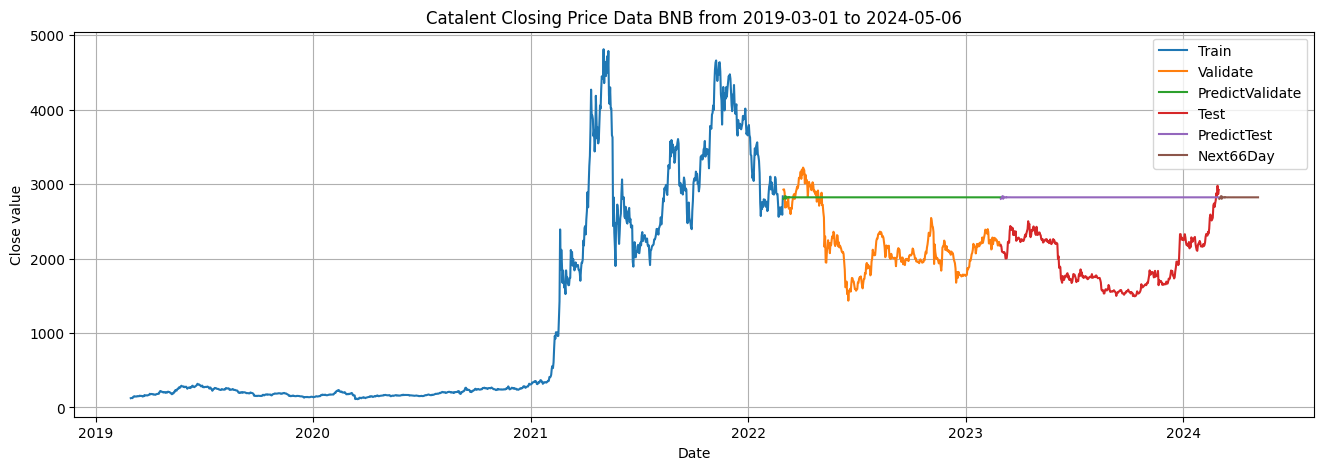

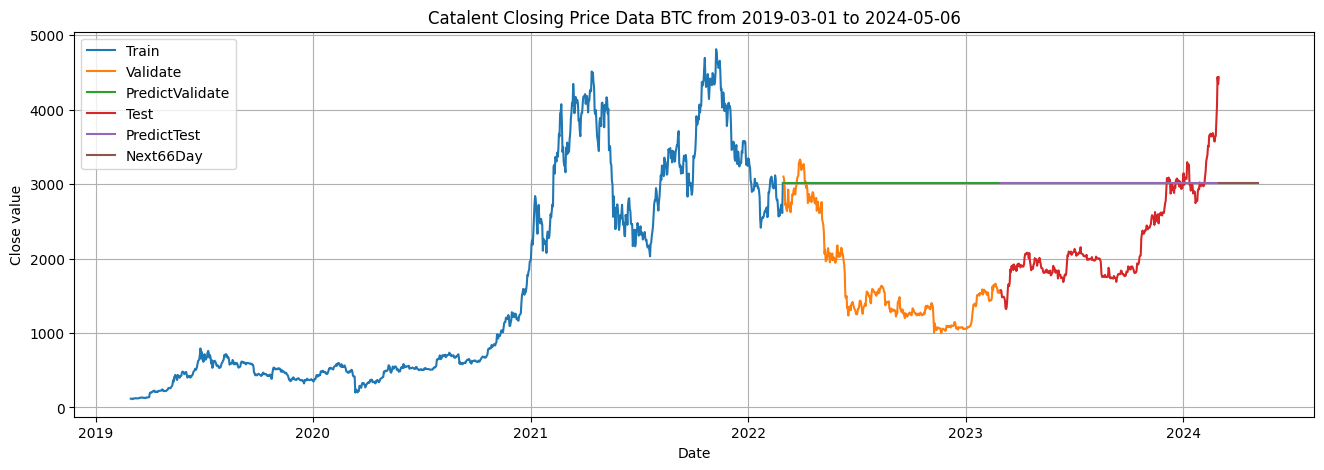

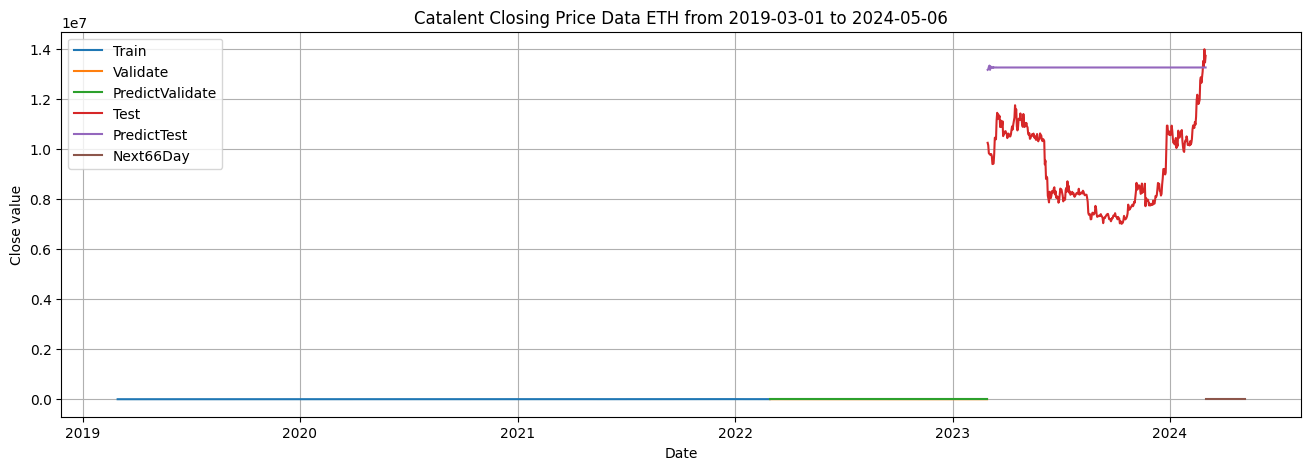

In [102]:
# Drawing
plt.figure(figsize=(16, 5))

plt.plot(df_BNB.index[:train_size_BNB], scaler.inverse_transform(np.array([y_train_BNB]).reshape(-1, 1)))

plt.plot(df_BNB.index[train_size_BNB : train_size_BNB + val_size_BNB], y_val_BNB)

plt.plot(df_BNB.index[train_size_BNB : train_size_BNB + val_size_BNB], y_pred_val_BNB)

plt.plot(df_BNB.index[train_size_BNB + val_size_BNB :], y_test_BNB)

plt.plot(df_BNB.index[train_size_BNB + val_size_BNB :], y_pred_BNB)

plt.plot(index_next_66_days_BNB, y_next_66_days_BNB)

plt.legend(['Train', 'Validate', 'PredictValidate', 'Test', 'PredictTest', 'Next66Day'])

plt.grid()
plt.title(f"Catalent Closing Price Data BNB from {df_BNB.index[0].strftime('%Y-%m-%d')} to {index_next_66_days_BNB[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.show()



plt.figure(figsize=(16, 5))

plt.plot(df_BTC.index[:train_size_BTC], scaler.inverse_transform(np.array([y_train_BTC]).reshape(-1, 1)))

plt.plot(df_BTC.index[train_size_BTC : train_size_BTC + val_size_BTC], y_val_BTC)

plt.plot(df_BTC.index[train_size_BTC : train_size_BTC + val_size_BTC], y_pred_val_BTC)

plt.plot(df_BTC.index[train_size_BTC + val_size_BTC :], y_test_BTC)

plt.plot(df_BTC.index[train_size_BTC + val_size_BTC :], y_pred_BTC)

plt.plot(index_next_66_days_BTC, y_next_66_days_BTC)

plt.legend(['Train', 'Validate', 'PredictValidate', 'Test', 'PredictTest', 'Next66Day'])

plt.grid()
plt.title(f"Catalent Closing Price Data BTC from {df_BTC.index[0].strftime('%Y-%m-%d')} to {index_next_66_days_BTC[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.show()


plt.figure(figsize=(16, 5))

plt.plot(df_ETH.index[:train_size_ETH], scaler.inverse_transform(np.array([y_train_ETH]).reshape(-1, 1)))

plt.plot(df_ETH.index[train_size_ETH : train_size_ETH + val_size_ETH], y_val_ETH)

plt.plot(df_ETH.index[train_size_ETH : train_size_ETH + val_size_ETH], y_pred_val_ETH)

plt.plot(df_ETH.index[train_size_ETH + val_size_ETH :], y_test_ETH)

plt.plot(df_ETH.index[train_size_ETH + val_size_ETH :], y_pred_ETH)

plt.plot(index_next_66_days_ETH, y_next_66_days_ETH)

plt.legend(['Train', 'Validate', 'PredictValidate', 'Test', 'PredictTest', 'Next66Day'])

plt.grid()
plt.title(f"Catalent Closing Price Data ETH from {df_ETH.index[0].strftime('%Y-%m-%d')} to {index_next_66_days_BTC[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.show()